<a href="https://colab.research.google.com/github/dsharma-memphis/DataMiningProject/blob/main/Adv_Stats_Adult_UCI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(ggplot2)
library(dplyr)

In [ ]:
adult <- read.csv("/content/adult.csv")

In [ ]:
head(adult)

,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
# Checking the structure of the data.
str(adult)


'data.frame':	48842 obs. of  15 variables:
 $ age            : int  25 38 28 44 18 34 29 63 24 55 ...
 $ workclass      : chr  "Private" "Private" "Local-gov" "Private" ...
 $ fnlwgt         : int  226802 89814 336951 160323 103497 198693 227026 104626 369667 104996 ...
 $ education      : chr  "11th" "HS-grad" "Assoc-acdm" "Some-college" ...
 $ educational.num: int  7 9 12 10 10 6 9 15 10 4 ...
 $ marital.status : chr  "Never-married" "Married-civ-spouse" "Married-civ-spouse" "Married-civ-spouse" ...
 $ occupation     : chr  "Machine-op-inspct" "Farming-fishing" "Protective-serv" "Machine-op-inspct" ...
 $ relationship   : chr  "Own-child" "Husband" "Husband" "Husband" ...
 $ race           : chr  "Black" "White" "White" "Black" ...
 $ gender         : chr  "Male" "Male" "Male" "Male" ...
 $ capital.gain   : int  0 0 0 7688 0 0 0 3103 0 0 ...
 $ capital.loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week : int  40 50 40 40 30 30 40 32 40 10 ...
 $ native.country : chr  "United-Sta

In [ ]:
# Checking the Summary of the data.
summary(adult)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:48842       Min.   :  12285   Length:48842      
 1st Qu.:28.00   Class :character   1st Qu.: 117550   Class :character  
 Median :37.00   Mode  :character   Median : 178144   Mode  :character  
 Mean   :38.64                      Mean   : 189664                     
 3rd Qu.:48.00                      3rd Qu.: 237642                     
 Max.   :90.00                      Max.   :1490400                     
 educational.num marital.status      occupation        relationship      
 Min.   : 1.00   Length:48842       Length:48842       Length:48842      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [ ]:
table(adult$workclass)


               ?      Federal-gov        Local-gov     Never-worked 
            2799             1432             3136               10 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           33906             1695             3862             1981 
     Without-pay 
              21 

In [ ]:
#combine are Never-worked and Without-pay
unemp <- function(job_role){
    job_role <- as.character(job_role)
    if (job_role=="Never-worked" | job_role=="Without-pay"){
        return("Unemployed")
    }else{
        return(job_role)
    }
}
adult$workclass <- sapply(adult$workclass,unemp)
table(adult$workclass)


               ?      Federal-gov        Local-gov          Private 
            2799             1432             3136            33906 
    Self-emp-inc Self-emp-not-inc        State-gov       Unemployed 
            1695             3862             1981               31 

In [ ]:
#SL-gov" and combine self-employed jobs called "self-emp
grp_emp <- function(job_role){
    if (job_role=="Local-gov" | job_role=="State-gov"){
        return("SL-gov")
    }else if (job_role=="Self-emp-inc" | job_role=="Self-emp-not-inc"){
        return("self-emp")
    }else{
        return(job_role)
    }
}
adult$workclass <- sapply(adult$workclass,grp_emp)
table(adult$workclass)


          ? Federal-gov     Private    self-emp      SL-gov  Unemployed 
       2799        1432       33906        5557        5117          31 

In [ ]:
table(adult$marital.status)


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 6633                    37                 22379 
Married-spouse-absent         Never-married             Separated 
                  628                 16117                  1530 
              Widowed 
                 1518 

In [ ]:
grp_marital_sts <- function(mart_sts){
    mart_sts <- as.character(mart_sts)

    # Not-Married
    if (mart_sts=="Separated" | mart_sts=="Divorced" | mart_sts=="Widowed"){
        return("Not-Married")

    # Never-Married
    }else if(mart_sts=="Never-married"){
        return(mart_sts)

     #Married
    }else{
        return("Married")
    }
}
adult$marital.status <- sapply(adult$marital.status,grp_marital_sts)
table(adult$marital.status)


      Married Never-married   Not-Married 
        23044         16117          9681 

In [ ]:
table(adult$native.country)


                         ?                   Cambodia 
                       857                         28 
                    Canada                      China 
                       182                        122 
                  Columbia                       Cuba 
                        85                        138 
        Dominican-Republic                    Ecuador 
                       103                         45 
               El-Salvador                    England 
                       155                        127 
                    France                    Germany 
                        38                        206 
                    Greece                  Guatemala 
                        49                         88 
                     Haiti         Holand-Netherlands 
                        75                          1 
                  Honduras                       Hong 
                        20                         30 
         

In [ ]:
Asia <- c("China","Hong","India","Iran","Cambodia","Japan", "Laos","Philippines" ,"Vietnam" ,"Taiwan", "Thailand")

N.A <- c("Canada","United-States","Puerto-Rico")

Europe <- c("England","France","Germany" ,"Greece","Holand-Netherlands","Hungary","Ireland","Italy","Poland","Portugal","Scotland"
            ,"Yugoslavia")

S.A <- c("Columbia","Cuba","Dominican-Republic","Ecuador","El-Salvador","Guatemala","Haiti","Honduras","Mexico","Nicaragua"
                   ,"Outlying-US","Peru","Jamaica","Trinadad&Tobago")
Remaining_count <- c("South")

In [ ]:
grp_cntry <- function(cntry){
    if (cntry %in% Asia){
        return("Asia")
    }else if (cntry %in% N.A){
        return("N.A")
    }else if (cntry %in% Europe){
        return("Europe")
    }else if (cntry %in% S.A){
        return("S.A")
    }else{
        return("Remaining_count")
    }
}
adult$native.country <- sapply(adult$native.country,grp_cntry)

In [ ]:
table(adult$native.country)


           Asia          Europe             N.A Remaining_count             S.A 
            981             780           44198             995            1888 

In [ ]:
# Checking the sturture of the data frame for data type
str(adult)

'data.frame':	48842 obs. of  15 variables:
 $ age            : int  25 38 28 44 18 34 29 63 24 55 ...
 $ workclass      : chr  "Private" "Private" "SL-gov" "Private" ...
 $ fnlwgt         : int  226802 89814 336951 160323 103497 198693 227026 104626 369667 104996 ...
 $ education      : chr  "11th" "HS-grad" "Assoc-acdm" "Some-college" ...
 $ educational.num: int  7 9 12 10 10 6 9 15 10 4 ...
 $ marital.status : chr  "Never-married" "Married" "Married" "Married" ...
 $ occupation     : chr  "Machine-op-inspct" "Farming-fishing" "Protective-serv" "Machine-op-inspct" ...
 $ relationship   : chr  "Own-child" "Husband" "Husband" "Husband" ...
 $ race           : chr  "Black" "White" "White" "Black" ...
 $ gender         : chr  "Male" "Male" "Male" "Male" ...
 $ capital.gain   : int  0 0 0 7688 0 0 0 3103 0 0 ...
 $ capital.loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week : int  40 50 40 40 30 30 40 32 40 10 ...
 $ native.country : chr  "N.A" "N.A" "N.A" "N.A" ...
 $ income         :

In [ ]:
# Converting into factor datatype
adult$workclass <- as.factor(adult$workclass)
adult$native.country <- as.factor(adult$native.country)
adult$marital.status <- as.factor(adult$marital.status)

In [ ]:
# Confirming the conversion
str(adult)

'data.frame':	48842 obs. of  15 variables:
 $ age            : int  25 38 28 44 18 34 29 63 24 55 ...
 $ workclass      : Factor w/ 6 levels "?","Federal-gov",..: 3 3 5 3 1 3 1 4 3 3 ...
 $ fnlwgt         : int  226802 89814 336951 160323 103497 198693 227026 104626 369667 104996 ...
 $ education      : chr  "11th" "HS-grad" "Assoc-acdm" "Some-college" ...
 $ educational.num: int  7 9 12 10 10 6 9 15 10 4 ...
 $ marital.status : Factor w/ 3 levels "Married","Never-married",..: 2 1 1 1 2 2 2 1 2 1 ...
 $ occupation     : chr  "Machine-op-inspct" "Farming-fishing" "Protective-serv" "Machine-op-inspct" ...
 $ relationship   : chr  "Own-child" "Husband" "Husband" "Husband" ...
 $ race           : chr  "Black" "White" "White" "Black" ...
 $ gender         : chr  "Male" "Male" "Male" "Male" ...
 $ capital.gain   : int  0 0 0 7688 0 0 0 3103 0 0 ...
 $ capital.loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week : int  40 50 40 40 30 30 40 32 40 10 ...
 $ native.country : Factor w/ 5 level

In [ ]:
install.packages("Amelia")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppArmadillo’




In [ ]:
library(Amelia)
adult[adult == "?"] <- NA

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [ ]:
table(adult$workclass)


          ? Federal-gov     Private    self-emp      SL-gov  Unemployed 
          0        1432       33906        5557        5117          31 

In [ ]:
adult$workclass <- as.factor(adult$workclass)
adult$native.country <- as.factor(adult$native.country)
adult$marital.status <- as.factor(adult$marital.status)
adult$income <- as.factor(adult$income)

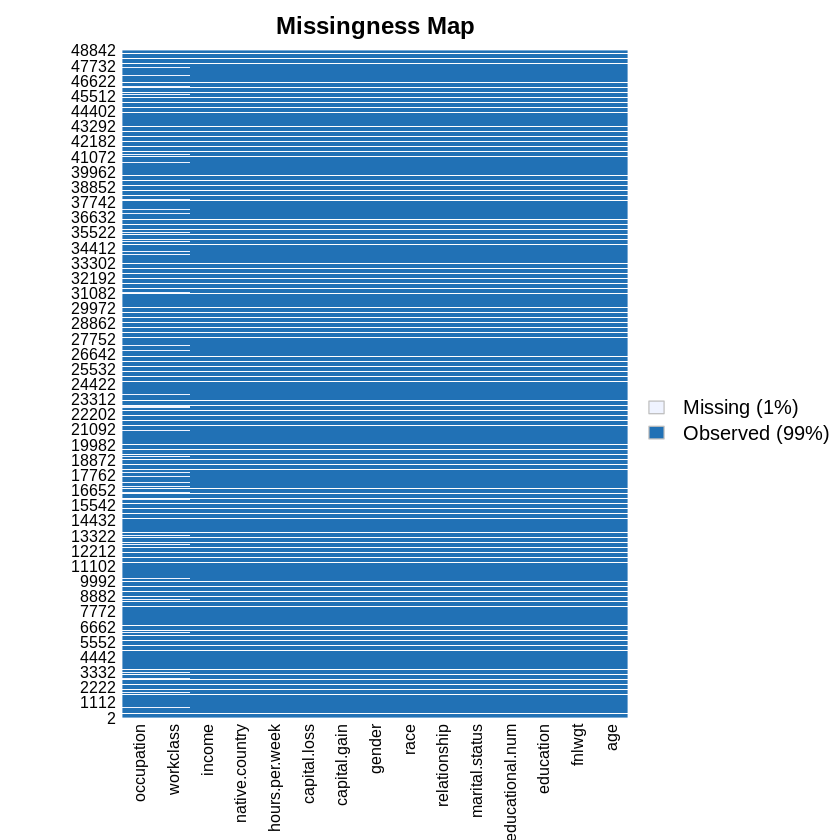

In [ ]:
missmap(adult)

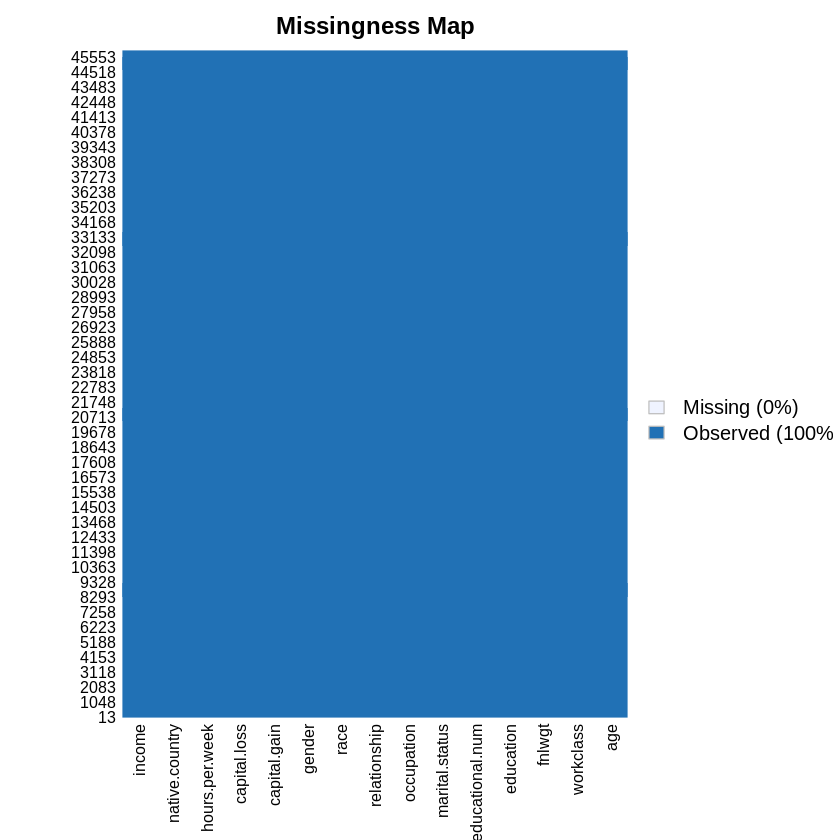

In [ ]:
adult <- na.omit(adult)
missmap(adult)

In [ ]:
# checking the structure of the data.
str(adult)

'data.frame':	46033 obs. of  15 variables:
 $ age            : int  25 38 28 44 34 63 24 55 65 36 ...
 $ workclass      : Factor w/ 6 levels "?","Federal-gov",..: 3 3 5 3 3 4 3 3 3 2 ...
 $ fnlwgt         : int  226802 89814 336951 160323 198693 104626 369667 104996 184454 212465 ...
 $ education      : chr  "11th" "HS-grad" "Assoc-acdm" "Some-college" ...
 $ educational.num: int  7 9 12 10 6 15 10 4 9 13 ...
 $ marital.status : Factor w/ 3 levels "Married","Never-married",..: 2 1 1 1 2 1 2 1 1 1 ...
 $ occupation     : chr  "Machine-op-inspct" "Farming-fishing" "Protective-serv" "Machine-op-inspct" ...
 $ relationship   : chr  "Own-child" "Husband" "Husband" "Husband" ...
 $ race           : chr  "Black" "White" "White" "Black" ...
 $ gender         : chr  "Male" "Male" "Male" "Male" ...
 $ capital.gain   : int  0 0 0 7688 0 3103 0 0 6418 0 ...
 $ capital.loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week : int  40 50 40 40 30 32 40 10 40 40 ...
 $ native.country : Factor w/ 5 le

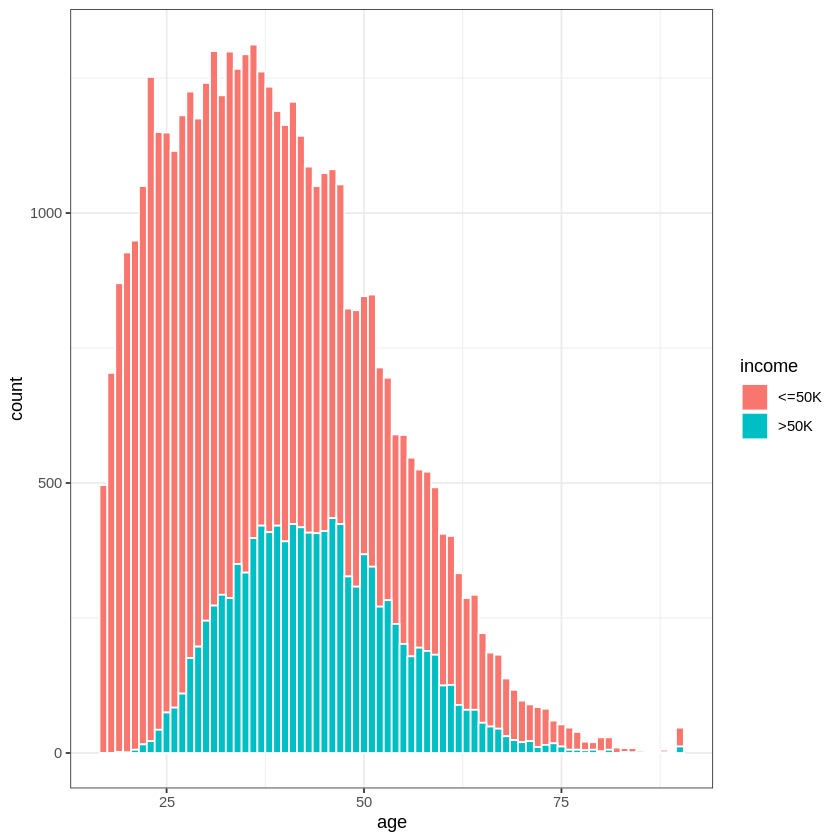

In [ ]:
# Creating a histogram of ages
ggplot(adult,aes(age)) + geom_histogram(aes(fill=income),color="white",binwidth=1) + theme_bw()

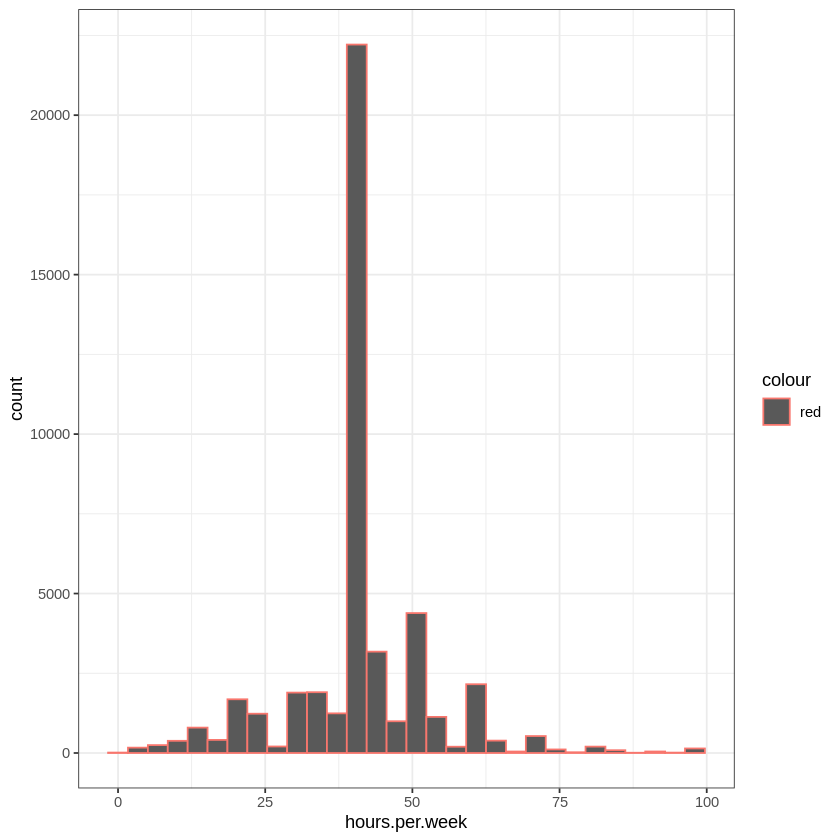

In [ ]:
# Ploting a histogram of hours worked per week
ggplot(adult,aes(hours.per.week)) + geom_histogram(aes(color="red"),bins = 30) + theme_bw()

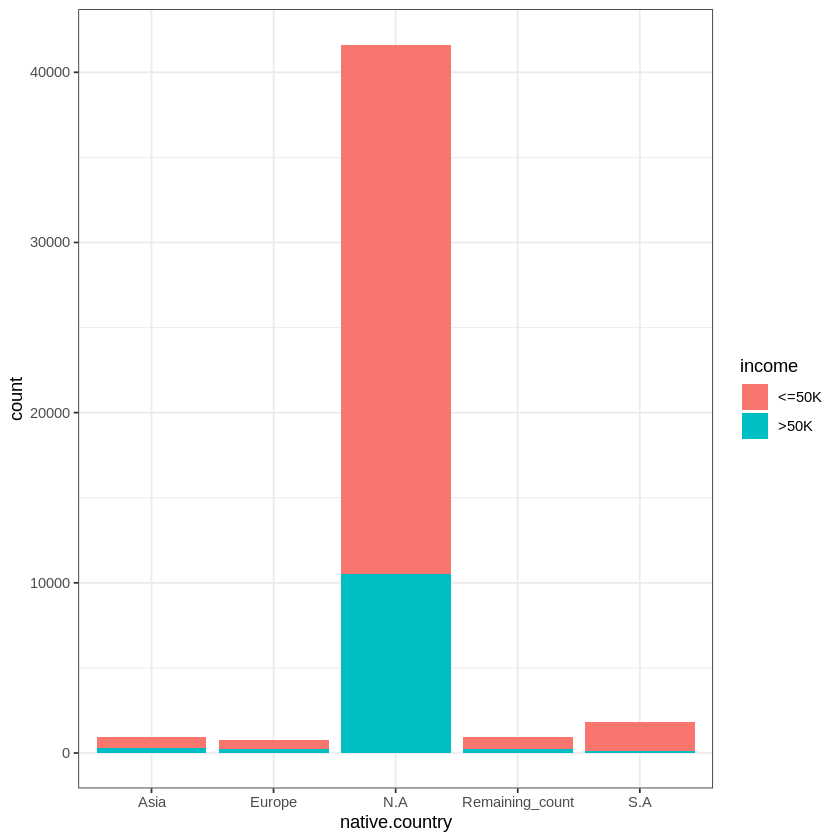

In [ ]:
# Creating a barplot of country
ggplot(adult,aes(native.country)) + geom_bar(aes(fill=income))+theme_bw()

In [ ]:
install.packages("caTools")
library(caTools)
# checking before building a model
head(adult)
set.seed(101)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<fct>,<fct>
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,N.A,<=50K
2,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,N.A,<=50K
3,28,SL-gov,336951,Assoc-acdm,12,Married,Protective-serv,Husband,White,Male,0,0,40,N.A,>50K
4,44,Private,160323,Some-college,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,N.A,>50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,N.A,<=50K
8,63,self-emp,104626,Prof-school,15,Married,Prof-specialty,Husband,White,Male,3103,0,32,N.A,>50K


In [ ]:
# Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample <- sample.split(adult$income, SplitRatio = 0.70)

# Training Data
train = subset(adult, sample == TRUE)

# Testing Data
test = subset(adult, sample == FALSE)

In [ ]:
##Logistic model
model = glm(income ~ ., family = binomial(logit), data = train)
summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = income ~ ., family = binomial(logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.2138  -0.5196  -0.1953  -0.0239   3.5470  

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -5.190e+00  3.581e-01 -14.496  < 2e-16 ***
age                            2.456e-02  1.626e-03  15.102  < 2e-16 ***
workclassPrivate              -5.264e-01  8.976e-02  -5.864 4.52e-09 ***
workclassself-emp             -8.551e-01  1.000e-01  -8.547  < 2e-16 ***
workclassSL-gov               -7.244e-01  1.009e-01  -7.179 7.00e-13 ***
workclassUnemployed           -1.756e+00  1.076e+00  -1.632 0.102607    
fnlwgt                         8.121e-07  1.688e-07   4.810 1.51e-06 ***
education11th                  2.261e-01  2.138e-01   1.058 0.290269    
education12th                  6.583e-01  2.667e-01   2.469 0.013564 *  
education1st-4th           

In [ ]:
# Confusion Matrix and predictions
test$predicted.income = predict(model, newdata=test, type="response")
table(test$income, test$predicted.income > 0.5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


       
        FALSE TRUE
  <=50K  9647  736
  >50K   1332 2095

In [ ]:
#use model to make predictions on test set
predicted <- predict(model, test, type="response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = <=50K, case = >50K

Setting direction: controls < cases



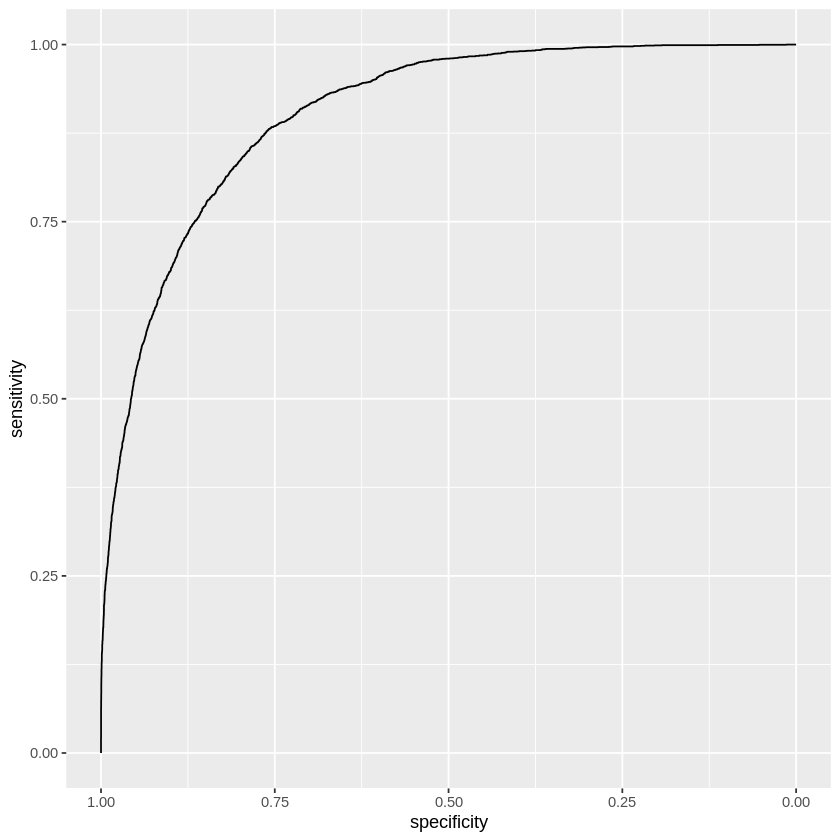

In [ ]:
#load necessary packages
install.packages("pROC")
library(pROC)

#define object to plot
rocobj <- roc(test$income, predicted)

#create ROC plot
ggroc(rocobj)

In [ ]:
confusionMatrix(test$income,predicted)
confusionMatrix

Setting levels: control = <=50K, case = >50K

Setting direction: controls < cases

Setting levels: control = <=50K, case = >50K

Setting direction: controls < cases



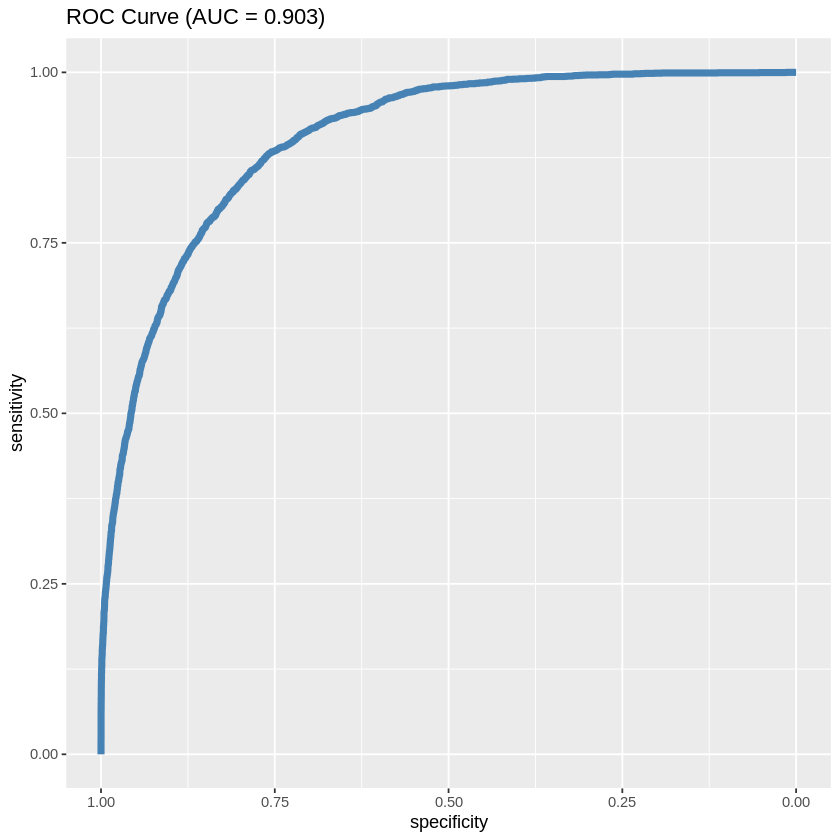

In [ ]:
#define object to plot and calculate AUC
lr_roc <- roc(test$income, predicted)
auc <- round(auc(test$income, predicted),4)

#create ROC plot
ggroc(lr_roc, colour = 'steelblue', size = 2) +
  ggtitle(paste0('ROC Curve ', '(AUC = ', auc, ')'))

In [ ]:
install.packages("ISLR2")
install.packages("e1071")
library(ISLR2)
library(e1071)

# checking before building a model
head(adult)
set.seed(101)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<fct>,<fct>
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,N.A,<=50K
2,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,N.A,<=50K
3,28,SL-gov,336951,Assoc-acdm,12,Married,Protective-serv,Husband,White,Male,0,0,40,N.A,>50K
4,44,Private,160323,Some-college,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,N.A,>50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,N.A,<=50K
8,63,self-emp,104626,Prof-school,15,Married,Prof-specialty,Husband,White,Male,3103,0,32,N.A,>50K


In [ ]:
# Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample_svm <- sample.split(adult$income, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train1 = subset(adult, sample_svm == TRUE)

# Testing Data
test1 = subset(adult, sample_svm == FALSE)

In [ ]:
# Applying SVM Model
model2 = svm(income ~ .,data = train1,type = 'C-classification',
                kernel = 'linear')
summary(model2)


Call:
svm(formula = income ~ ., data = train1, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  11425

 ( 5721 5704 )


Number of Classes:  2 

Levels: 
 <=50K >50K




In [ ]:
# Prediction of data and Confusion Matrix
predicted1 = predict(model2, newdata=test1, type="response")
table(test.adult$income, predicted1)

       predicted1
        <=50K >50K
  <=50K  8367 2016
  >50K   2775  652

In [ ]:
library(pROC)
#define object to plot and calculate AUC
SVM_roc <- roc(as.integer(test.adult$income), as.integer(test_predict))
auc <- round(auc(as.integer(test.adult$income), as.integer(test_predict),4)

#create ROC plot
ggroc(SVM_roc, colour = 'steelblue', size = 2) +
  ggtitle(paste0('ROC Curve ', '(AUC = ', auc, ')'))

ERROR: ignored

In [ ]:
library(pROC)
#define object to plot and calculate AUC
SVM_roc <- roc(as.integer(test.adult$income), as.integer(test_predict))
auc <- round(auc(as.integer(test.adult$income), as.integer(test_predict),4)

#create ROC plot
ggroc(SVM_roc, colour = 'steelblue', size = 2) +
  ggtitle(paste0('ROC Curve ', '(AUC = ', auc, ')'))

ERROR: ignored

In [ ]:
# Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample_svm <- sample.split(adult$income, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train1 = subset(adult, sample_svm == TRUE)

# Testing Data
test1 = subset(adult, sample_svm == FALSE)

In [ ]:
# Applying SVM Model
model_svm= svm(income ~ .,data = train1)
summary(model_svm)

In [ ]:
# Prediction of data and Confusion Matrix
test1$pred.value = predict(model_svm, newdata=test1, type="response")
table(test.adult$income, test1$pred.value)

In [ ]:
#use model to make predictions on test set
predicted_svm <- predict(model_svm, test1, type="response")

In [ ]:
#define object to plot
roc_svm <- roc(as.integer(test1$income), as.integer(predicted_svm))

#create ROC plot
ggroc(roc_svm)

ERROR: ignored

In [ ]:
#define object to plot
roc_svm <- roc(as.integer(test1$income), as.integer(predicted_svm))

#create ROC plot
#ggroc(roc_svm)

auc <- round(auc(as.integer(test1$income), as.integer(predicted_svm)),4)

#create ROC plot
ggroc(roc_svm, colour = 'steelblue', size = 2) +
  ggtitle(paste0('ROC Curve ', '(AUC = ', auc, ')'))

ERROR: ignored

In [ ]:

conf_mat<-confusionMatrix(test1$income, predicted_svm,positive = "high")
conf_mat
